# Evaluation Survey Responses

The full set of survey questions were: 

- eval-clear - Overall, how clear did you find the concept of the Data Hazards?
- eval-easy - How easy was it to apply the Data Hazards to the projects?
- eval-hazards-useful - How useful did you think the Data Hazards were for exploring potential downfalls of data science projects?
- eval-group-useful - How useful was the reflective group activity for helping to decide on the relevant hazards?

For ease of analysis we will use a version of the likert responses that have been turned from words to their corresponding values (`likert-values.txt`), where 1 is the most positive response and 5 is the most negative response.

In [1]:
import pandas as pd
import plot_likert  # Plotting library based on matplotlib
import matplotlib.pyplot as plt  # We import matplotlib to use the subplots feature
from matplotlib import gridspec  # To control the subplot grid

In [2]:
# Read data (note, not UTF8 encoded)

data = pd.read_csv('likert-values.txt', sep='\t', encoding = "ISO-8859-1")

In [3]:
data.head()

,eval-clear,eval-easy,eval-hazards-useful,eval-group-useful,eval-learned
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,2.0,2.0,2.0
2,1.0,1.0,1.0,2.0,1.0
3,2.0,1.0,1.0,2.0,1.0
4,1.0,2.0,1.0,2.0,1.0


In [4]:
# Drop those NA rows

data = data.dropna()

In [5]:
# Change floats to ints (for plot_likert package)

data = data.astype(int)
data = data.astype(str)

In [6]:
data.head()

,eval-clear,eval-easy,eval-hazards-useful,eval-group-useful,eval-learned
0,1,1,1,1,1
1,1,2,2,2,2
2,1,1,1,2,1
3,2,1,1,2,1
4,1,2,1,2,1


In [7]:
# Brief overview of the data

data.describe()

,eval-clear,eval-easy,eval-hazards-useful,eval-group-useful,eval-learned
count,41,41,41,41,41
unique,3,4,3,3,3
top,1,2,1,1,1
freq,21,19,24,22,25


In [8]:
# We're going to re-code eval-learned from 1,2,3 to 1,3,5 so that it can be plotted with the other questions. 

data = data.replace({'eval-learned': {'3': '5', '2': '3'}})

In [9]:
# Set up custom colours using PiYGn (https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=5)

customcolours5 = ['#ffffff00', '#4dac26', '#b8e186', 'silver', '#f1b6da', '#d01c8b']

/Users/ff18302/opt/anaconda3/envs/datahazardsanalysis/lib/python3.11/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


[Text(0, 0, 'Learned from the group discussion'),
 Text(0, 1, 'Reflective group activity is useful'),
 Text(0, 2, 'Hazards are useful'),
 Text(0, 3, 'Hazards are easy to apply'),
 Text(0, 4, 'Concept is clear')]

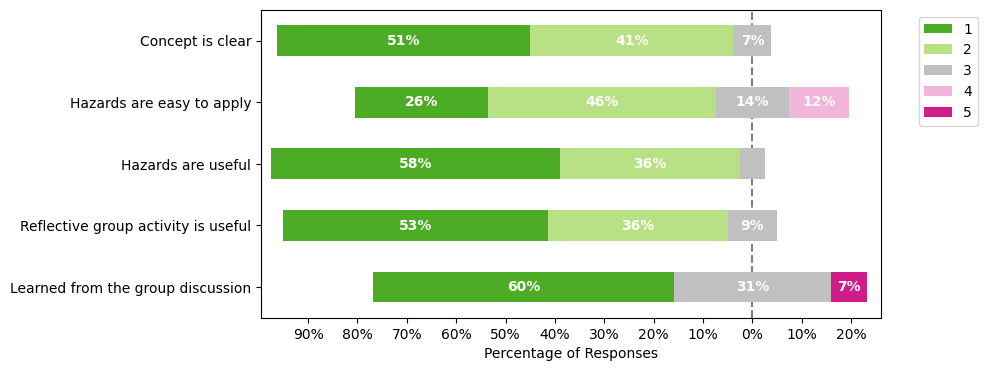

In [10]:
# Make the figure for the four questions that had five response options. 

plt = plot_likert.plot_likert(
    data, 
    plot_likert.scales.raw5, # Default scale is 1-5
    plot_percentage=True,
    bar_labels=True,
    colors=customcolours5,
    figsize=(8,4))

plt.set_yticklabels(["Learned from the group discussion",
                    "Reflective group activity is useful",
                     "Hazards are useful",
                     "Hazards are easy to apply",
                     "Concept is clear"])

In [12]:
# Save the image out

plt.figure.savefig('survey_results.pdf', dpi=330, bbox_inches='tight')